In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder 

In [100]:
df=pd.read_csv("fraud.csv")

In [101]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [5]:
# null handling , in this data no null
df.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [102]:
# drop the column isFlaggedFraud because isFlaggedFraud and isFraud two columns give same information
df.drop(columns="isFlaggedFraud",inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [8]:
df.describe()   

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


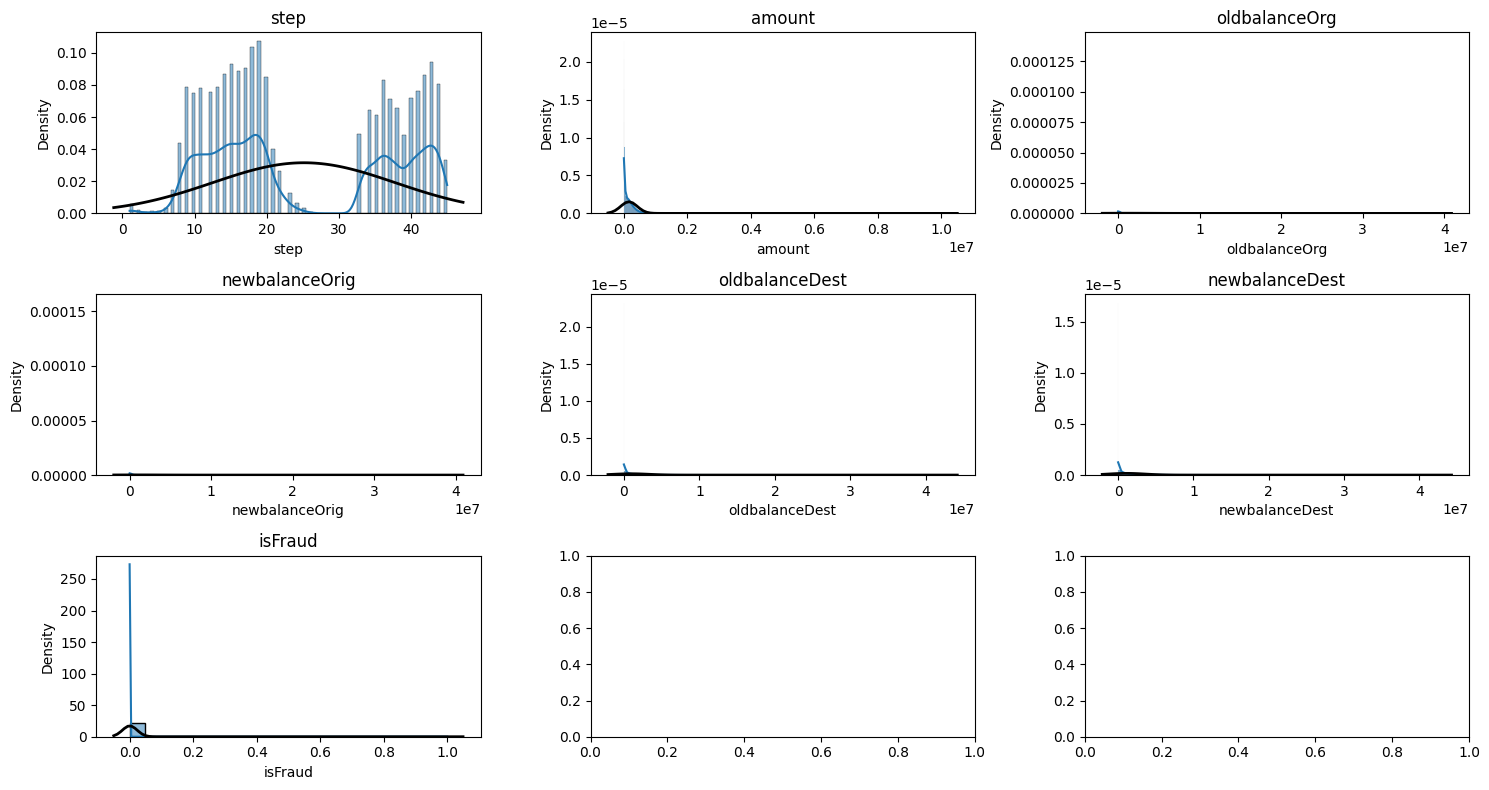

In [9]:
df=df[0:1000000]
data = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',"isFraud"]]
# Plot histograms with normal distribution fit
columns = data.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i//3, i%3], stat="density")
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i//3, i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i//3, i%3].plot(x, p, 'k', linewidth=2)
    axes[i//3, i%3].set_title(f'{column}')
    axes[i//3, i%3].set_ylabel('Density')

plt.tight_layout()
plt.show()

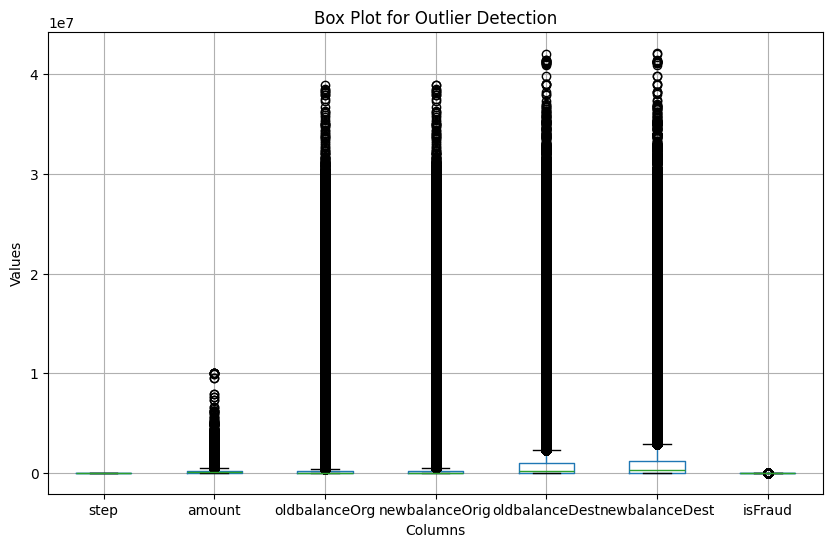

In [10]:
import matplotlib.pyplot as plt
# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.grid(True)
plt.show()

In [103]:
# outlier detection

def outlier(df,value):
    q1=df[value].quantile(0.25)
    q3= df[value].quantile(0.75)
    IQR = q3-q1
    wisker1 = q1-1.5*IQR
    wisker2 = q3+1.5*IQR
    return wisker1,wisker2


In [104]:
columns=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
for column in columns:
    wisker1,wisker2= outlier(df,column)
    df=df[(df[column]>=wisker1) & (df[column]<=wisker2)]
    print(wisker1)
    print(wisker2)

-112.5
603.5
-279631.29
501793.53
-170051.17875
283418.63125
-35955.915
59926.525
-1049565.0787499999
1749275.1312499999
-763714.81125
1272858.01875


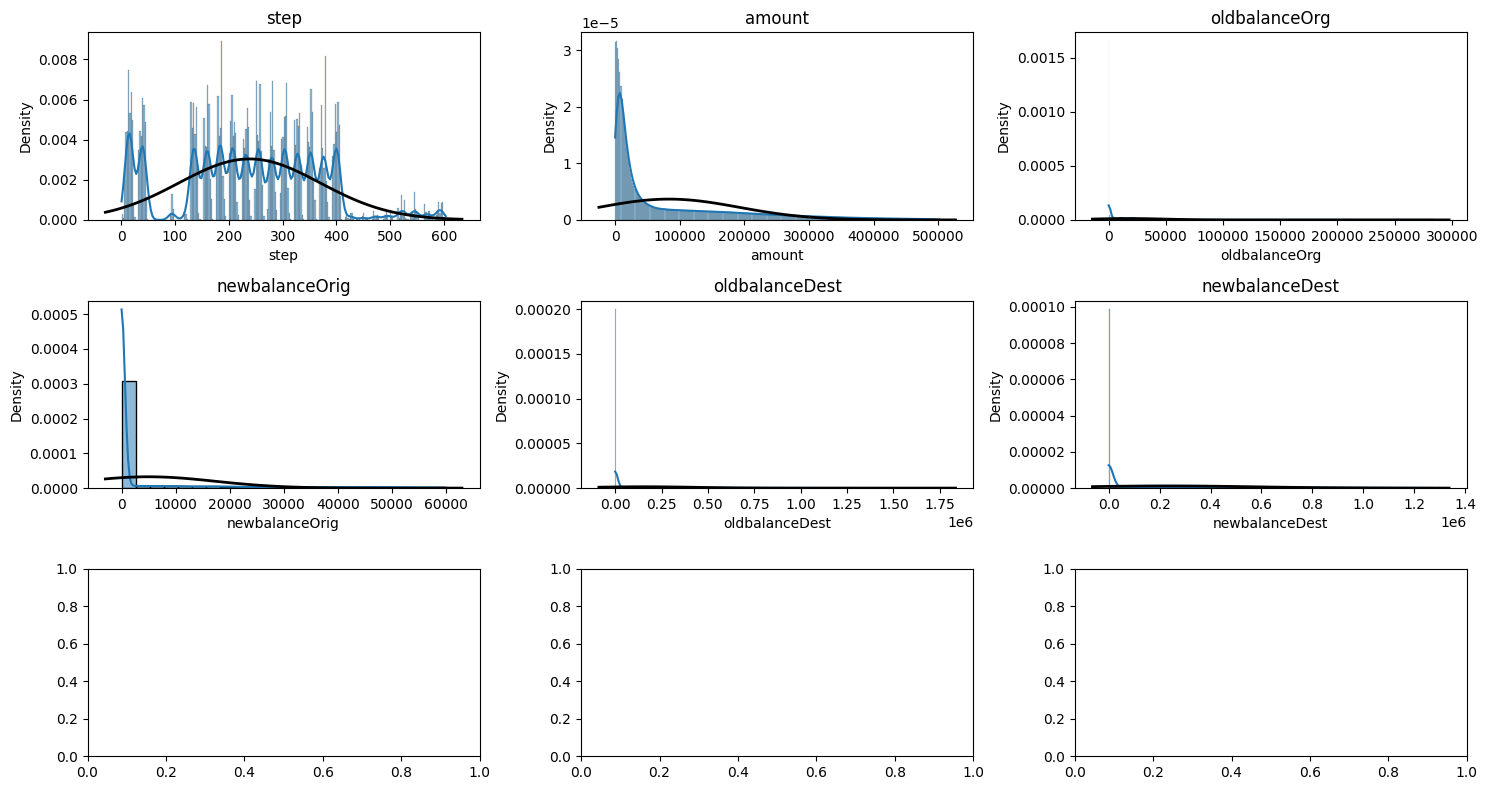

In [10]:
data = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
# Plot histograms with normal distribution fit
columns = data.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i//3, i%3], stat="density")
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i//3, i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i//3, i%3].plot(x, p, 'k', linewidth=2)
    axes[i//3, i%3].set_title(f'{column}')
    axes[i//3, i%3].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [105]:
len (df)

3199292

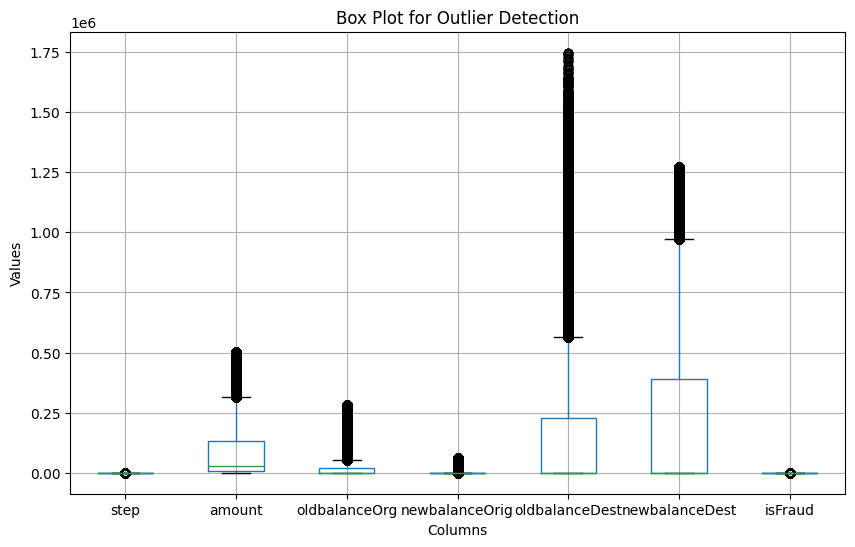

In [42]:

import matplotlib.pyplot as plt
# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.grid(True)
plt.show()

In [18]:
data = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud']]
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.016625,-0.000258,-0.000614,-0.011018,-0.019200,0.010469
amount,-0.016625,1.000000,0.222135,-0.242911,0.391904,0.652010,0.006549
oldbalanceOrg,-0.000258,0.222135,1.000000,0.401542,-0.027136,0.052919,0.080404
newbalanceOrig,-0.000614,-0.242911,0.401542,1.000000,-0.142891,-0.199965,-0.011235
oldbalanceDest,-0.011018,0.391904,-0.027136,-0.142891,1.000000,0.938212,-0.006107
newbalanceDest,-0.019200,0.652010,0.052919,-0.199965,0.938212,1.000000,-0.007142
isFraud,0.010469,0.006549,0.080404,-0.011235,-0.006107,-0.007142,1.000000


In [106]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [27]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.009616,-0.016625,-0.000129,-0.000258,-0.000614,0.011593,-0.011018,-0.019200,0.010469
type,0.009616,1.000000,-0.454535,-0.000840,-0.120404,0.109044,0.667694,-0.451896,-0.527240,0.012369
amount,-0.016625,-0.454535,1.000000,0.000339,0.222135,-0.242911,-0.546678,0.391904,0.652010,0.006549
nameOrig,-0.000129,-0.000840,0.000339,1.000000,0.000055,0.000041,-0.000613,-0.000606,-0.000406,-0.001469
oldbalanceOrg,-0.000258,-0.120404,0.222135,0.000055,1.000000,0.401542,-0.129342,-0.027136,0.052919,0.080404
newbalanceOrig,-0.000614,0.109044,-0.242911,0.000041,0.401542,1.000000,0.162255,-0.142891,-0.199965,-0.011235
nameDest,0.011593,0.667694,-0.546678,-0.000613,-0.129342,0.162255,1.000000,-0.489489,-0.589149,-0.023511
oldbalanceDest,-0.011018,-0.451896,0.391904,-0.000606,-0.027136,-0.142891,-0.489489,1.000000,0.938212,-0.006107
newbalanceDest,-0.019200,-0.527240,0.652010,-0.000406,0.052919,-0.199965,-0.589149,0.938212,1.000000,-0.007142
isFraud,0.010469,0.012369,0.006549,-0.001469,0.080404,-0.011235,-0.023511,-0.006107,-0.007142,1.000000


In [108]:
# machine learning without future engineering

# it is categorical dat a that why i choose the logical regression

x=df.drop(columns=["isFraud"])

y=df["isFraud"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


In [109]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train,y_train)

pre=clf.predict(x_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn.metrics import classification_report, roc_curve, auc
report=classification_report(y_test,pre)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    639361
           1       0.74      0.37      0.50       498

    accuracy                           1.00    639859
   macro avg       0.87      0.69      0.75    639859
weighted avg       1.00      1.00      1.00    639859



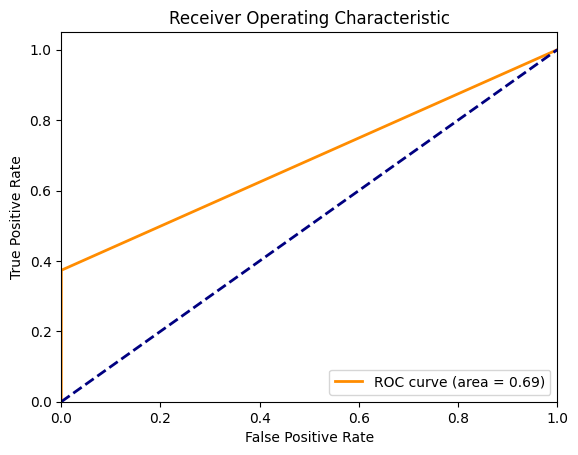

In [52]:
fpr, tpr, _ = roc_curve(y_test, pre)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [88]:
# in my accuracy are so poor i want change the Randomforestclassifier

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
fit_model=rf_classifier.fit(x_train, y_train)
y_pred = fit_model.predict(x_test)

In [90]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       504
           1       1.00      0.99      1.00       477

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



# in this model overfitting so i balance the target data

In [8]:
#in this model overfitting so i balance the target data

df["isFraud"].value_counts()

isFraud
0    3196840
1       2452
Name: count, dtype: int64

In [73]:
df_1 = df[df['isFraud'] == 0].iloc[:2452]
df_0 = df[df['isFraud'] ==1 ]

# Concatenate the slices
df = pd.concat([df_1, df_0]).reset_index(drop=True)
df["isFraud"].value_counts()


isFraud
0    2452
1    2452
Name: count, dtype: int64

In [75]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
    df[column]=label_encoder.fit_transform(df[column])


In [76]:

x=df.drop(columns=["isFraud"])
y=df["isFraud"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
pre=clf.predict(x_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
fin=pd.DataFrame({'y_test': y_test, 'pre': pre})

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(fin["y_test"],fin["pre"])


0.9918450560652395

In [91]:
from sklearn.metrics import classification_report, roc_curve, auc
report=classification_report(y_test,pre)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       504
           1       1.00      0.99      0.99       477

    accuracy                           0.99       981
   macro avg       0.99      0.99      0.99       981
weighted avg       0.99      0.99      0.99       981



# conclude after the balance dataframe are still overfitting